# Word Cloud Generation

# Setup

In [1]:
from tqdm.notebook import tqdm
from collections import defaultdict
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def save_wordcloud(data, title):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40,
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    # fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.savefig(fname='Output/' + title, dpi=300, bbox_inches='tight')

  0%|          | 0/6 [00:00<?, ?it/s]

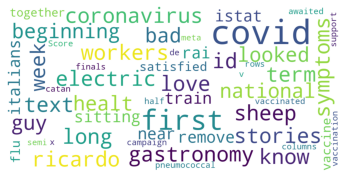

In [2]:
LanguageDataFrames = defaultdict(lambda: {'December':None, 'January':None, 'February':None, 'March':None, 'April':None, 'May':None})

languages = {
                1: 'en',
                2: 'es',
                3: 'fr',
                4: 'de',
                5: 'nl',
                6: 'it',
            }

for month in tqdm(['December', 'January', 'February', 'March', 'April', 'May']):
    for language in languages:
        daypaths = []
        for day in [0, 1, 2, 3, 4]:
                daypaths.append('Data/Analyzed Tweets/' + str(month) + str(day) + languages[language] + '.json')

        LanguageDataFrames[language][month] = pd.read_json(daypaths[0])
        for day in [1, 2, 3, 4]:
            LanguageDataFrames[language][month] = LanguageDataFrames[language][month].append(pd.read_json(daypaths[day]), ignore_index = True)

        data = LanguageDataFrames[language][month]
        title = month + ' ' + languages[language] + ' word cloud'

        save_wordcloud(data, title)

